In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import Normalizer
from keras.layers import Activation, Dense, Dropout, BatchNormalization, Input
from keras.models import Model
#from keras.optimizers import adam
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
%matplotlib inline
plt.style.use('fivethirtyeight')

In [ ]:
diabetes_df = pd.read_csv('/content/diabetes - diabetes.csv', delimiter=',')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1.0,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8.0,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,5.0,116.0,74.0,29.15342,155.548223,25.6,0.201,30,0


In [ ]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               699 non-null    float64
 1   Glucose                   699 non-null    float64
 2   BloodPressure             699 non-null    float64
 3   SkinThickness             699 non-null    float64
 4   Insulin                   699 non-null    float64
 5   BMI                       699 non-null    float64
 6   DiabetesPedigreeFunction  699 non-null    float64
 7   Age                       699 non-null    int64  
 8   Outcome                   699 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 49.3 KB


In [ ]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.497845,118.923367,72.452334,28.700534,138.210721,32.059846,0.453226,33.218884,0.333333
std,2.986838,28.923994,12.048536,7.904574,42.469555,6.592754,0.294884,11.670470,0.471742
min,1.000000,44.000000,24.000000,8.000000,22.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.000000,64.000000,25.000000,116.000000,27.300000,0.238500,24.000000,0.000000
50%,4.494673,115.000000,72.405184,29.153420,155.548223,32.000000,0.364000,29.000000,0.000000
75%,6.000000,136.000000,80.000000,32.000000,155.548223,35.900000,0.600500,40.500000,1.000000
max,17.000000,199.000000,122.000000,52.000000,255.000000,57.300000,1.731000,81.000000,1.000000


In [ ]:
diabetes_df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.183524,0.268740,0.150577,0.173991,0.118290,0.003072,0.510390,0.246918
Glucose,0.183524,1.000000,0.250671,0.118644,0.348854,0.186172,0.072542,0.281225,0.483856
BloodPressure,0.268740,0.250671,1.000000,0.184851,0.179849,0.267415,0.016629,0.341073,0.182515
SkinThickness,0.150577,0.118644,0.184851,1.000000,0.227392,0.524647,0.042018,0.129152,0.192592
Insulin,0.173991,0.348854,0.179849,0.227392,1.000000,0.180543,0.030866,0.222912,0.260541
BMI,0.118290,0.186172,0.267415,0.524647,0.180543,1.000000,0.104906,0.045768,0.315579
DiabetesPedigreeFunction,0.003072,0.072542,0.016629,0.042018,0.030866,0.104906,1.000000,0.053236,0.177710
Age,0.510390,0.281225,0.341073,0.129152,0.222912,0.045768,0.053236,1.000000,0.224055
Outcome,0.246918,0.483856,0.182515,0.192592,0.260541,0.315579,0.177710,0.224055,1.000000


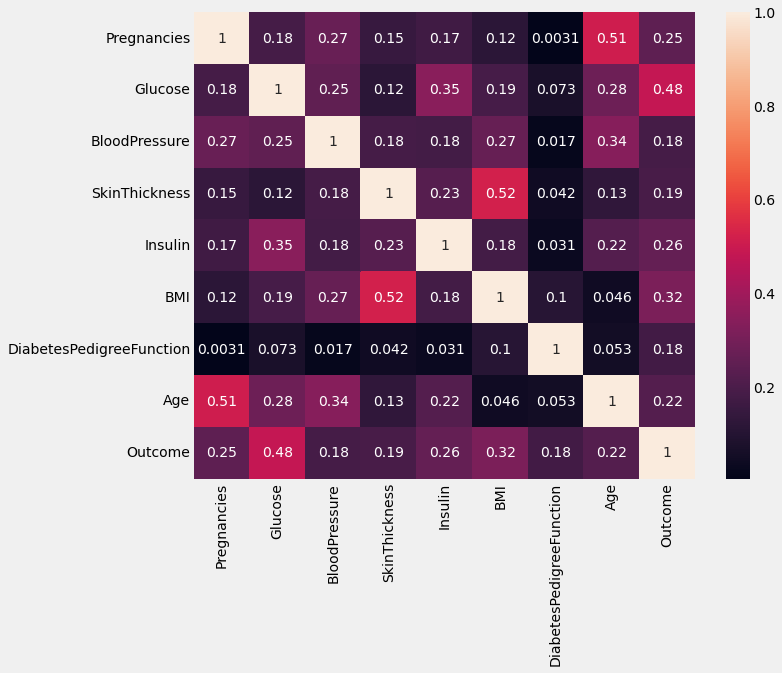

In [ ]:
f, ax = plt.subplots(1, figsize=(10,8))
sns.heatmap(diabetes_df.corr(), annot=True, ax=ax)

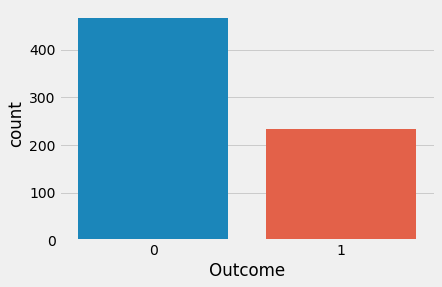

In [ ]:
sns.countplot(x=diabetes_df.Outcome)

In [ ]:
diabetes_df.drop(columns=['BloodPressure','SkinThickness','DiabetesPedigreeFunction'] ,axis=1, inplace=True)

In [ ]:
diabetes_df.describe()

,Pregnancies,Glucose,Insulin,BMI,Age,Outcome
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.497845,118.923367,138.210721,32.059846,33.218884,0.333333
std,2.986838,28.923994,42.469555,6.592754,11.670470,0.471742
min,1.000000,44.000000,22.000000,18.200000,21.000000,0.000000
25%,2.000000,99.000000,116.000000,27.300000,24.000000,0.000000
50%,4.494673,115.000000,155.548223,32.000000,29.000000,0.000000
75%,6.000000,136.000000,155.548223,35.900000,40.500000,1.000000
max,17.000000,199.000000,255.000000,57.300000,81.000000,1.000000


In [ ]:

from sklearn.preprocessing import MinMaxScaler
import numpy as np

# copy the data
df_sklearn = diabetes_df.copy()

# apply normalization techniques
for column in diabetes_df.columns:
 df_sklearn[column] = MinMaxScaler().fit_transform(np.array(df_sklearn[column]).reshape(-1,1))

# view normalized data
display(df_sklearn)
diabetes_df=df_sklearn

,Pregnancies,Glucose,Insulin,BMI,Age,Outcome
0,0.3125,0.670968,0.573168,0.393862,0.483333,1.0
1,0.0000,0.264516,0.573168,0.214834,0.166667,0.0
2,0.4375,0.896774,0.573168,0.130435,0.183333,1.0
3,0.0000,0.290323,0.309013,0.253197,0.000000,0.0
4,0.2500,0.464516,0.573168,0.189258,0.150000,0.0
...,...,...,...,...,...,...
694,0.5625,0.367742,0.678112,0.375959,0.700000,0.0
695,0.0625,0.503226,0.573168,0.475703,0.100000,0.0
696,0.2500,0.496774,0.386266,0.204604,0.150000,0.0
697,0.0000,0.529032,0.573168,0.304348,0.433333,1.0


In [ ]:

diabetes_df.describe()

,Pregnancies,Glucose,Insulin,BMI,Age,Outcome
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,0.218615,0.483377,0.498758,0.354472,0.203648,0.333333
std,0.186677,0.186606,0.182273,0.168613,0.194508,0.471742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.062500,0.354839,0.403433,0.232737,0.050000,0.000000
50%,0.218417,0.458065,0.573168,0.352941,0.133333,0.000000
75%,0.312500,0.593548,0.573168,0.452685,0.325000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Neural Networks


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [ ]:
from sklearn.model_selection import train_test_split
x = diabetes_df.iloc[:,:-1]
y = diabetes_df.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=5)

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(5, input_shape=(5, )))
model.add(tf.keras.layers.Dense(5, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 30        
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import warnings
warnings.filterwarnings("ignore")


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from tensorflow.keras.optimizers import SGD
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)


In [ ]:
for train, test in kfold.split(x, y):
  x_train = x.iloc[train]
  y_train = y.iloc[train]
  x_test = x.iloc[test]
  y_test = y.iloc[test]

In [ ]:
opt = SGD(lr=0.01, momentum=0.9)

In [ ]:
 model = tf.keras.Sequential()
 model.add(tf.keras.layers.Dense(5, input_shape=(5, )))
 model.add(tf.keras.layers.Dense(5, activation="relu"))
 model.add(tf.keras.layers.Dense(1, activation="sigmoid"))
 model.compile(optimizer=opt, metrics='accuracy', loss='mse')


In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 5)                 30        
                                                                 
 dense_40 (Dense)            (None, 5)                 30        
                                                                 
 dense_41 (Dense)            (None, 1)                 6         
                                                                 
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train, batch_size=15, epochs=200, verbose=0, validation_data=(x_test, y_test)),
_,acc = model.evaluate(x_test, y_test)
print(acc)

5/5 [==============================] - 0s 3ms/step - loss: 0.1529 - accuracy: 0.7842
0.7841726541519165


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from tensorflow.keras.optimizers import SGD
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)


In [ ]:
for train, test in kfold.split(x, y):
  x_train = x.iloc[train]
  y_train = y.iloc[train]
  x_test = x.iloc[test]
  y_test = y.iloc[test]
opt = SGD(lr=0.01, momentum=0.9)

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(5, input_shape=(5, )))
model.add(tf.keras.layers.Dense(26, activation="relu"))
model.add(tf.keras.layers.Dense(5, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))
model.compile(optimizer=opt, metrics='accuracy', loss='mse')

In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 5)                 30        
                                                                 
 dense_43 (Dense)            (None, 26)                156       
                                                                 
 dense_44 (Dense)            (None, 5)                 135       
                                                                 
 dense_45 (Dense)            (None, 1)                 6         
                                                                 
Total params: 327
Trainable params: 327
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train, batch_size=15, epochs=200, verbose=0, validation_data=(x_test, y_test))
_, acc = model.evaluate(x_test, y_test)
print(acc)

5/5 [==============================] - 0s 4ms/step - loss: 0.1514 - accuracy: 0.7626
0.7625899314880371


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from tensorflow.keras.optimizers import SGD
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

In [ ]:
for train, test in kfold.split(x, y):
  x_train = x.iloc[train]
  y_train = y.iloc[train]
  x_test = x.iloc[test]
  y_test = y.iloc[test]
opt = SGD(lr=0.01, momentum=0.9)

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(5, input_shape=(5, )))
model.add(tf.keras.layers.Dense(16, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="relu"))
model.add(tf.keras.layers.Dense(5, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))
model.compile(optimizer=opt, metrics='accuracy', loss='mse')

In [ ]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 5)                 30        
                                                                 
 dense_47 (Dense)            (None, 16)                96        
                                                                 
 dense_48 (Dense)            (None, 10)                170       
                                                                 
 dense_49 (Dense)            (None, 5)                 55        
                                                                 
 dense_50 (Dense)            (None, 1)                 6         
                                                                 
Total params: 357
Trainable params: 357
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train, batch_size=15, epochs=200, verbose=0, validation_data=(x_test, y_test))
_, acc = model.evaluate(x_test, y_test)
print(acc)

5/5 [==============================] - 0s 3ms/step - loss: 0.1455 - accuracy: 0.7986
0.798561155796051


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from tensorflow.keras.optimizers import SGD
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)


In [ ]:
for train, test in kfold.split(x, y):
  x_train = x.iloc[train]
  y_train = y.iloc[train]
  x_test = x.iloc[test]
  y_test = y.iloc[test]
opt = SGD(lr=0.01, momentum=0.9)

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(5, input_shape=(5, )))
model.add(tf.keras.layers.Dense(5, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))
model.compile(optimizer=opt, metrics='accuracy', loss='mse')

In [ ]:
model.fit(x_train, y_train, batch_size=15, epochs=400, verbose=0, validation_data=(x_test, y_test))
_, acc = model.evaluate(x_test, y_test)
print(acc)

5/5 [==============================] - 0s 3ms/step - loss: 0.1512 - accuracy: 0.7698
0.769784152507782


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from tensorflow.keras.optimizers import SGD
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)


In [ ]:
for train, test in kfold.split(x, y):
  x_train = x.iloc[train]
  y_train = y.iloc[train]
  x_test = x.iloc[test]
  y_test = y.iloc[test]

opt = SGD(lr=0.01, momentum=0.9)

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(5, input_shape=(5, )))
model.add(tf.keras.layers.Dense(26, activation="relu"))
model.add(tf.keras.layers.Dense(5, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))
model.compile(optimizer=opt, metrics='accuracy', loss='mse')

In [ ]:
model.fit(x_train, y_train, batch_size=15, epochs=400, verbose=0, validation_data=(x_test, y_test))
_, acc = model.evaluate(x_test, y_test)
print(acc)


5/5 [==============================] - 0s 4ms/step - loss: 0.1617 - accuracy: 0.7626
0.7625899314880371


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from tensorflow.keras.optimizers import SGD
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)


In [ ]:
for train, test in kfold.split(x, y):
  x_train = x.iloc[train]
  y_train = y.iloc[train]
  x_test = x.iloc[test]
  y_test = y.iloc[test]

opt = SGD(lr=0.01, momentum=0.9)

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(5, input_shape=(5, )))
model.add(tf.keras.layers.Dense(16, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="relu"))
model.add(tf.keras.layers.Dense(5, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))
model.compile(optimizer=opt, metrics='accuracy', loss='mse')

In [ ]:
model.fit(x_train, y_train, batch_size=15, epochs=400, verbose=0, validation_data=(x_test, y_test))
_, acc = model.evaluate(x_test, y_test)
print(acc)

5/5 [==============================] - 0s 4ms/step - loss: 0.1593 - accuracy: 0.7482
0.7482014298439026


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from tensorflow.keras.optimizers import SGD
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)


In [ ]:
for train, test in kfold.split(x, y):
  x_train = x.iloc[train]
  y_train = y.iloc[train]
  x_test = x.iloc[test]
  y_test = y.iloc[test]

opt = SGD(lr=0.01, momentum=0.9)

In [ ]:
 model = tf.keras.Sequential()
 model.add(tf.keras.layers.Dense(5, input_shape=(5, )))
 model.add(tf.keras.layers.Dense(5, activation="relu"))
 model.add(tf.keras.layers.Dense(1, activation="sigmoid"))
 model.compile(optimizer=opt, metrics='accuracy', loss='mse')

In [ ]:
model.fit(x_train, y_train, batch_size=15, epochs=800, verbose=0, validation_data=(x_test, y_test))
_, acc = model.evaluate(x_test, y_test)
print(acc)


5/5 [==============================] - 0s 3ms/step - loss: 0.1527 - accuracy: 0.7554
0.7553957104682922


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from tensorflow.keras.optimizers import SGD
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

In [ ]:
for train, test in kfold.split(x, y):
  x_train = x.iloc[train]
  y_train = y.iloc[train]
  x_test = x.iloc[test]
  y_test = y.iloc[test]

opt = SGD(lr=0.01, momentum=0.9)

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(5, input_shape=(5, )))
model.add(tf.keras.layers.Dense(26, activation="relu"))
model.add(tf.keras.layers.Dense(5, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))
model.compile(optimizer=opt, metrics='accuracy', loss='mse')

In [ ]:
model.fit(x_train, y_train, batch_size=15, epochs=800, verbose=0, validation_data=(x_test, y_test))
_, acc = model.evaluate(x_test, y_test)
print(acc)


5/5 [==============================] - 0s 3ms/step - loss: 0.1547 - accuracy: 0.7554
0.7553957104682922


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from tensorflow.keras.optimizers import SGD
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

In [ ]:
for train, test in kfold.split(x, y):
  x_train = x.iloc[train]
  y_train = y.iloc[train]
  x_test = x.iloc[test]
  y_test = y.iloc[test]

opt = SGD(lr=0.01, momentum=0.9)

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(5, input_shape=(5, )))
model.add(tf.keras.layers.Dense(16, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="relu"))
model.add(tf.keras.layers.Dense(5, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))
model.compile(optimizer=opt, metrics='accuracy', loss='mse')

In [ ]:
model.fit(x_train, y_train, batch_size=15, epochs=800, verbose=0, validation_data=(x_test, y_test))
_, acc = model.evaluate(x_test, y_test)
print(acc)

5/5 [==============================] - 0s 3ms/step - loss: 0.1579 - accuracy: 0.7770
0.7769784331321716
